In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import matplotlib as mpl

In [10]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import kaggle
from sklearn.model_selection import train_test_split
PATH =  "ashrae-energy-prediction/"
#train_df = pd.read_pickle(PATH + "train.pkl")

In [4]:
train_df = pd.read_pickle(PATH + "train.pkl")

# Think About timestamp

In [5]:
train_df.timestamp = pd.to_datetime(train_df.timestamp)

In [6]:
train_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016


# building_id  == 0

In [7]:
train_df_build0 = train_df.query('building_id == 0')

In [8]:
train_df_build0.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
2301,0,0,2016-01-01 01:00:00,0.0,0,Education,7432,2008.0,NaN,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,1,2016
4594,0,0,2016-01-01 02:00:00,0.0,0,Education,7432,2008.0,NaN,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,1,2016
6893,0,0,2016-01-01 03:00:00,0.0,0,Education,7432,2008.0,NaN,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,1,2016
9189,0,0,2016-01-01 04:00:00,0.0,0,Education,7432,2008.0,NaN,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,1,2016


Only Five Data → No kidding!! It's Only Head.

So, We should not seperate by building_id 

In [9]:
len(train_df_build0)

8784

In [10]:
24 * 365

8760

Ploting By Time Then 

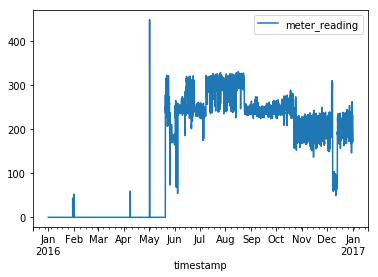

In [11]:
train_df_build0.plot("timestamp","meter_reading")

# Almost target_values from Jan ~ May is 0.0
# But Sometimes There is Increasing

Think About Other building Too

In [12]:
building_id_arr = train_df.building_id.unique()

In [13]:
building_id_arr

array([  0,   1,   2, ..., 591, 783, 403])

In [14]:
len(building_id_arr)

1449

# Can draw graphs automatically by for or other function ? 
→ I couldn't find , so I draw them by one

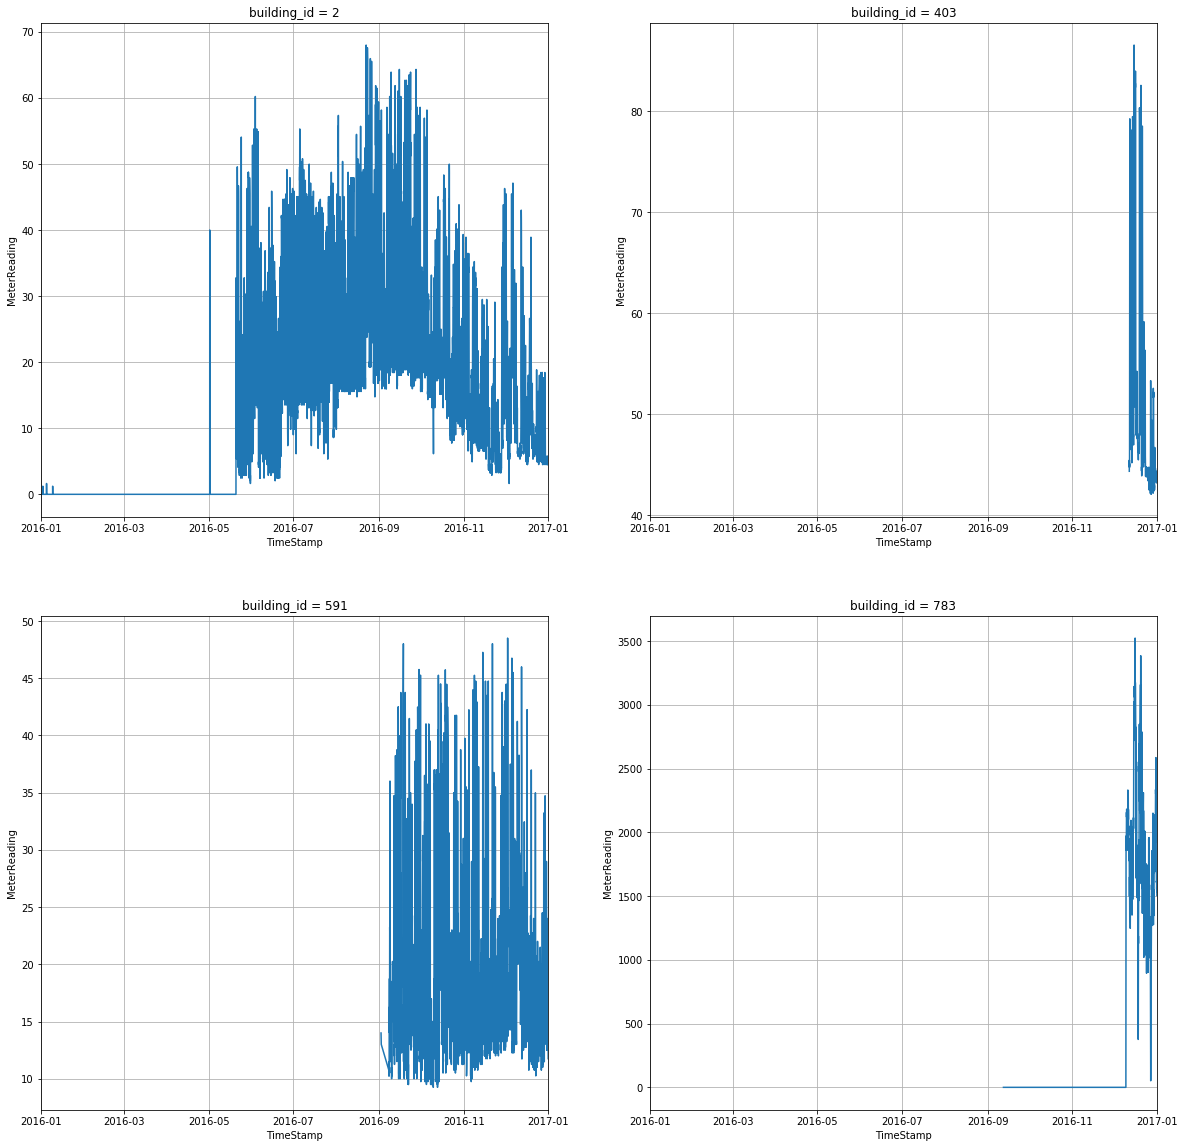

In [15]:
from datetime import datetime as dt
train_df_build_2 = train_df.query('building_id == 2')[["timestamp","meter_reading"]]
train_df_build_403 = train_df.query('building_id == 403')[["timestamp","meter_reading"]]
train_df_build_591 = train_df.query('building_id == 591')[["timestamp","meter_reading"]]
train_df_build_783 = train_df.query('building_id == 783')[["timestamp","meter_reading"]]
fig,ax = plt.subplots(2,2,figsize = (20,20))

ax[0,0].plot(train_df_build_2.timestamp,train_df_build_2.meter_reading)
ax[0,0].set_title('building_id = 2')
ax[0,0].set_xlabel('TimeStamp')
ax[0,0].set_ylabel('MeterReading')
ax[0,0].set_xlim(dt.strptime("2016-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'),dt.strptime("2017-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'))
ax[0,0].grid(True)

ax[0,1].plot(train_df_build_403.timestamp,train_df_build_403.meter_reading)
ax[0,1].set_title('building_id = 403')
ax[0,1].set_xlabel('TimeStamp')
ax[0,1].set_ylabel('MeterReading')
ax[0,1].set_xlim(dt.strptime("2016-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'),dt.strptime("2017-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'))
ax[0,1].grid(True)

ax[1,0].plot(train_df_build_591.timestamp,train_df_build_591.meter_reading)
ax[1,0].set_title('building_id = 591')
ax[1,0].set_xlabel('TimeStamp')
ax[1,0].set_ylabel('MeterReading')
ax[1,0].set_xlim(dt.strptime("2016-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'),dt.strptime("2017-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'))
ax[1,0].grid(True)

ax[1,1].plot(train_df_build_783.timestamp,train_df_build_783.meter_reading)
ax[1,1].set_title('building_id = 783')
ax[1,1].set_xlabel('TimeStamp')
ax[1,1].set_ylabel('MeterReading')
ax[1,1].set_xlim(dt.strptime("2016-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'),dt.strptime("2017-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'))
ax[1,1].grid(True)

plt.show()

# At some of buldings have no data before 2016-09


①ビルごとで区切らない方で、築年数とかで想定する

②5月以前は-0とする

TODO

・Drop Building_id,SiteID ,TimeStamp

・気温の時系列データ。

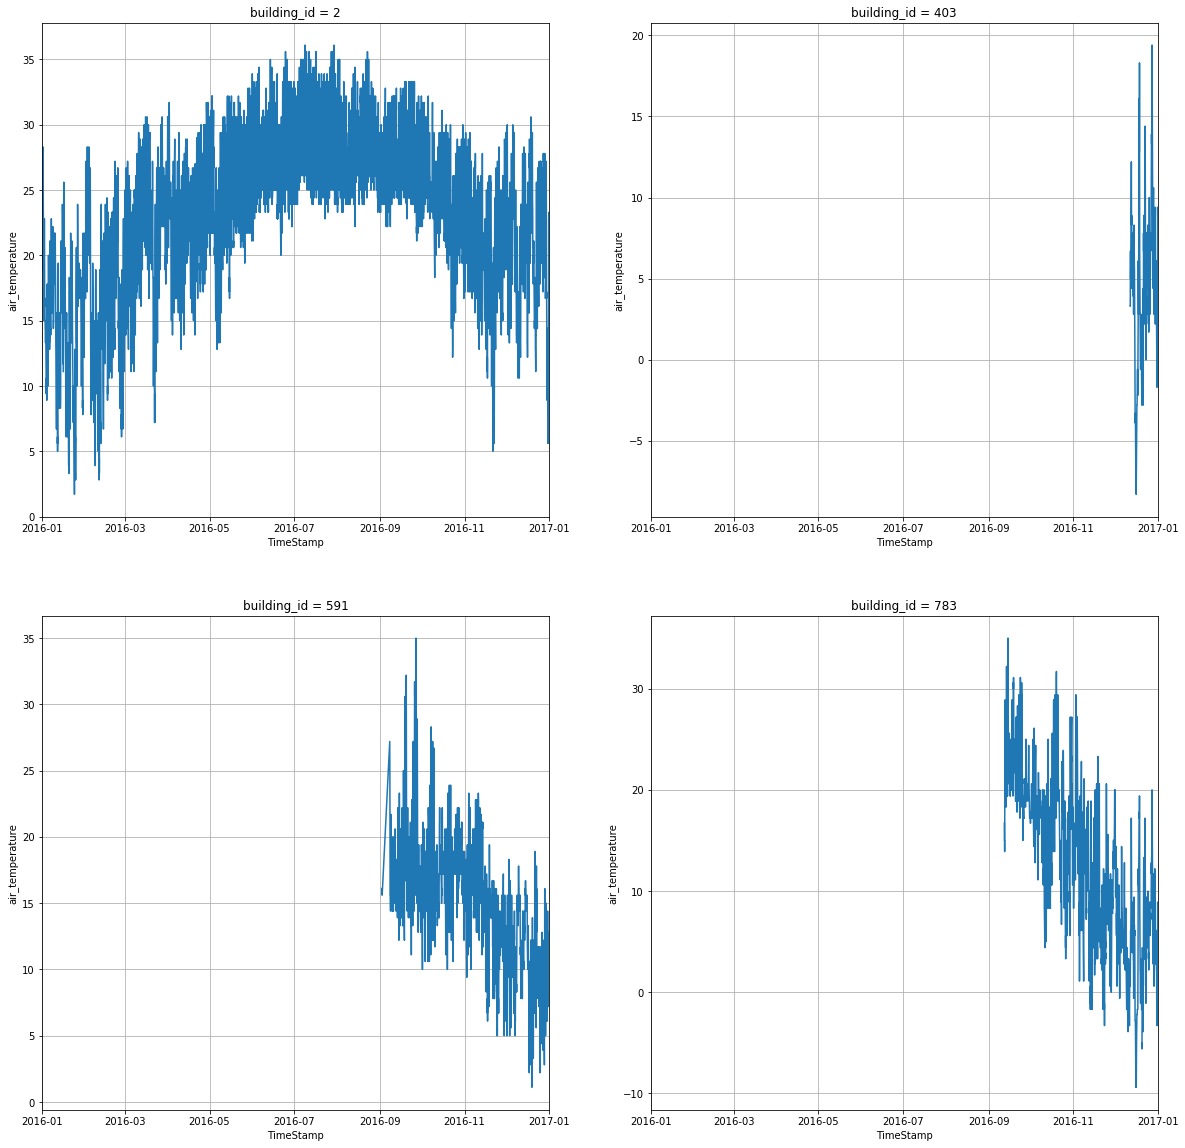

In [16]:
from datetime import datetime as dt
train_df_build_2 = train_df.query('building_id == 2')[["timestamp","air_temperature"]]
train_df_build_403 = train_df.query('building_id == 403')[["timestamp","air_temperature"]]
train_df_build_591 = train_df.query('building_id == 591')[["timestamp","air_temperature"]]
train_df_build_783 = train_df.query('building_id == 783')[["timestamp","air_temperature"]]
fig,ax = plt.subplots(2,2,figsize = (20,20))

ax[0,0].plot(train_df_build_2.timestamp,train_df_build_2.air_temperature)
ax[0,0].set_title('building_id = 2')
ax[0,0].set_xlabel('TimeStamp')
ax[0,0].set_ylabel('air_temperature')
ax[0,0].set_xlim(dt.strptime("2016-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'),dt.strptime("2017-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'))
ax[0,0].grid(True)

ax[0,1].plot(train_df_build_403.timestamp,train_df_build_403.air_temperature)
ax[0,1].set_title('building_id = 403')
ax[0,1].set_xlabel('TimeStamp')
ax[0,1].set_ylabel('air_temperature')
ax[0,1].set_xlim(dt.strptime("2016-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'),dt.strptime("2017-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'))
ax[0,1].grid(True)

ax[1,0].plot(train_df_build_591.timestamp,train_df_build_591.air_temperature)
ax[1,0].set_title('building_id = 591')
ax[1,0].set_xlabel('TimeStamp')
ax[1,0].set_ylabel('air_temperature')
ax[1,0].set_xlim(dt.strptime("2016-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'),dt.strptime("2017-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'))
ax[1,0].grid(True)

ax[1,1].plot(train_df_build_783.timestamp,train_df_build_783.air_temperature)
ax[1,1].set_title('building_id = 783')
ax[1,1].set_xlabel('TimeStamp')
ax[1,1].set_ylabel('air_temperature')
ax[1,1].set_xlim(dt.strptime("2016-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'),dt.strptime("2017-01-01 00:00:00", '%Y-%m-%d %H:%M:%S'))
ax[1,1].grid(True)

plt.show()

# The peak of temperature exists nearby August(8)

TODO
・季節変数を作ることを視野に入れる。
→ 

In [17]:
train_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016


cleaning and drop Data

In [18]:
train_df.drop(["building_id","site_id","timestamp"],axis = 1,inplace = True)

# 一日当たりのmeterの変化を描写するグラフ

In [19]:
train_df.head()

,meter,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year
0,0,0.0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
1,0,0.0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
2,0,0.0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
3,0,0.0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
4,0,0.0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016


# fill the np.nan by mean()

In [20]:
mean_dict = kaggle.get_mean_dict(train_df)

In [21]:
mean_dict

[{'year_built': 1968.2767356683075},
 {'floor_count': 4.184848127979634},
 {'air_temperature': 15.987952737489769},
 {'cloud_coverage': 1.9004228436531971},
 {'dew_temperature': 7.747429309915309},
 {'precip_depth_1_hr': 0.796415538714005},
 {'sea_level_pressure': 1016.0854873724754},
 {'wind_direction': 173.01510391722684},
 {'wind_speed': 3.3775245837257293}]

In [22]:
for mean in mean_dict:
    train_df.fillna(mean,inplace = True)
train_df.head()

,meter,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year
0,0,0.0,Education,7432,2008.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016
1,0,0.0,Education,2720,2004.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016
2,0,0.0,Education,5376,1991.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016
3,0,0.0,Education,23685,2002.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016
4,0,0.0,Education,116607,1975.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016


In [23]:
train_df.isnull().sum()

meter                 0
meter_reading         0
primary_use           0
square_feet           0
year_built            0
floor_count           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
month                 0
year                  0
dtype: int64

# disappered np.nan value!!
# Create new feature value "Age" which is the age of the building

In [24]:
train_df["age"] =train_df.year - train_df.year_built
train_df.head()

,meter,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year,age
0,0,0.0,Education,7432,2008.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,8.0
1,0,0.0,Education,2720,2004.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,12.0
2,0,0.0,Education,5376,1991.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,25.0
3,0,0.0,Education,23685,2002.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,14.0
4,0,0.0,Education,116607,1975.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,41.0


In [25]:
train_df.meter.unique()

array([0, 3, 1, 2])

# apply one-hot-encoding to meter

In [26]:
train_df = pd.get_dummies(data = train_df,columns = ["meter"])

In [27]:
train_df.head()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year,age,meter_0,meter_1,meter_2,meter_3
0,0.0,Education,7432,2008.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,8.0,1,0,0,0
1,0.0,Education,2720,2004.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,12.0,1,0,0,0
2,0.0,Education,5376,1991.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,25.0,1,0,0,0
3,0.0,Education,23685,2002.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,14.0,1,0,0,0
4,0.0,Education,116607,1975.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,41.0,1,0,0,0


# apply Target_Encoding to "primary_use","wind_speed","wind_direction"

In [28]:
from sklearn.model_selection import StratifiedKFold 
kf = StratifiedKFold (n_splits = 4 , random_state = 0)
def target_encode(train_df,train_target,column_list,kf):#,test_df
    for column in column_list:
        data_encoding = pd.DataFrame({
            column:train_df[column],
            "target" : train_target
        })
        # encoded_cat_list = data_encoding.groupby(column)["target"].mean()
        # test_df[column] = test_df[column].map(encoded_cat_list)
        print("data_encoding shape : " + str(data_encoding.shape))
        tmp = np.repeat(np.nan,data_encoding.shape[0])
        print(data_encoding.shape)
        print(train_target.shape)
        for idx1,idx2 in kf.split(data_encoding,train_target,"continuous"):
            train_encode_map  = data_encoding.iloc[idx1].groupby(column)["target"].mean()
            tmp[idx2] = train_df[column].iloc[idx2].map(train_encode_map)
        train_df[column] = tmp

In [29]:
train_target = train_df.meter_reading
#target_encode(train_df,train_target,["primary_use","wind_speed","wind_direction"],kf)
for idx1,idx2 in kf.split(train_df,train_target,'continuous'):
    pass

ValueError: Found input variables with inconsistent numbers of samples: [20216100, 20216100, 10]

連続地のTargetEncodingがうまくいかない→保留。ひとまず,One-Hot

In [30]:
train_df.head()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year,age,meter_0,meter_1,meter_2,meter_3
0,0.0,Education,7432,2008.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,8.0,1,0,0,0
1,0.0,Education,2720,2004.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,12.0,1,0,0,0
2,0.0,Education,5376,1991.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,25.0,1,0,0,0
3,0.0,Education,23685,2002.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,14.0,1,0,0,0
4,0.0,Education,116607,1975.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,0.0,1,2016,41.0,1,0,0,0


In [31]:
train_df = pd.get_dummies(data = train_df,columns = ["primary_use","wind_direction"])

In [32]:
train_df.head()

,meter_reading,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,...,wind_direction_270.0,wind_direction_280.0,wind_direction_290.0,wind_direction_300.0,wind_direction_310.0,wind_direction_320.0,wind_direction_330.0,wind_direction_340.0,wind_direction_350.0,wind_direction_360.0
0,0.0,7432,2008.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,2720,2004.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,5376,1991.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,23685,2002.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,116607,1975.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,...,0,0,0,0,0,0,0,0,0,0


drop target value from train_df

In [33]:
train_df.drop("meter_reading",axis = 1,inplace = True)

In [34]:
train_df.head()

,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,month,...,wind_direction_270.0,wind_direction_280.0,wind_direction_290.0,wind_direction_300.0,wind_direction_310.0,wind_direction_320.0,wind_direction_330.0,wind_direction_340.0,wind_direction_350.0,wind_direction_360.0
0,7432,2008.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2720,2004.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,5376,1991.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,23685,2002.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,116607,1975.0,4.184848,25.0,6.0,20.0,0.796416,1019.7,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train_target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: meter_reading, dtype: float64

# Starting Train

In [38]:
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))


|            Variable Name|    Memory|
 ------------------------------------ 
|                       In|       432|
|                      Out|       648|
|                     PATH|        74|
|          StratifiedKFold|      1056|
|                   X_test|1358521944|
|                  X_train|2037782904|
|                       ax|       144|
|          building_id_arr|     11688|
|                       dt|       400|
|                eval_data|        56|
|                     exit|        56|
|                      fig|        56|
|              get_ipython|        64|
|                   kaggle|        80|
|                       kf|        56|
|                      lgb|        80|
|                     mean|       240|
|                mean_dict|       192|
|                      mpl|        80|
|                       np|        80|
|                   params|       240|
|                       pd|        80|
|                      plt|        80|
|                     qui

In [41]:
from sklearn.model_selection import train_test_split
X_train ,X_test = train_test_split(train_df,test_size = 0.4,random_state = 0)
y_train,y_test = train_test_split(train_target,test_size = 0.4,random_state = 0)
del train_target,train_df
import gc
gc.collect()
# 訓練・テストデータの設定
train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)
params = {
    'objective': 'regression',
    "task":"train",
    "n_estimators":500,
    "learning_rate":0.05
    #"num_leaves":num_leaves
    }
gbm = lgb.train(
        params,
        train_data,
        valid_sets=eval_data,
        num_boost_round=100,
        verbose_eval=5
)

/home/yada_yuki_entertainment/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's l2: 1.65347e+10
[10]	valid_0's l2: 1.16989e+10
[15]	valid_0's l2: 8.76151e+09
[20]	valid_0's l2: 6.95561e+09
[25]	valid_0's l2: 5.79482e+09
[30]	valid_0's l2: 5.06391e+09
[35]	valid_0's l2: 4.58785e+09
[40]	valid_0's l2: 4.27978e+09
[45]	valid_0's l2: 4.05419e+09
[50]	valid_0's l2: 3.89776e+09
[55]	valid_0's l2: 3.78825e+09
[60]	valid_0's l2: 3.70904e+09
[65]	valid_0's l2: 3.6476e+09
[70]	valid_0's l2: 3.59349e+09
[75]	valid_0's l2: 3.55892e+09
[80]	valid_0's l2: 3.53956e+09
[85]	valid_0's l2: 3.50402e+09
[90]	valid_0's l2: 3.47449e+09
[95]	valid_0's l2: 3.44515e+09
[100]	valid_0's l2: 3.44194e+09
[105]	valid_0's l2: 3.43217e+09
[110]	valid_0's l2: 3.39893e+09
[115]	valid_0's l2: 3.39841e+09
[120]	valid_0's l2: 3.37698e+09
[125]	valid_0's l2: 3.37351e+09
[130]	valid_0's l2: 3.36871e+09
[135]	valid_0's l2: 3.36161e+09
[140]	valid_0's l2: 3.35637e+09
[145]	valid_0's l2: 3.3494e+09
[150]	valid_0's l2: 3.34298e+09
[155]	valid_0's l2: 3.3407e+09
[160]	valid_0's l2: 3.34062e+09

In [42]:
X_train.head()

,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,month,...,wind_direction_270.0,wind_direction_280.0,wind_direction_290.0,wind_direction_300.0,wind_direction_310.0,wind_direction_320.0,wind_direction_330.0,wind_direction_340.0,wind_direction_350.0,wind_direction_360.0
2094783,252268,1968.276736,4.184848,18.9,0.000000,0.6,0.0,1019.8,3.1,2,...,0,0,0,0,0,0,0,0,0,0
2050991,26033,1968.276736,4.184848,7.2,0.000000,1.7,0.0,1029.4,1.5,2,...,0,0,0,0,0,0,0,0,0,0
4600600,73277,1968.276736,4.184848,10.0,1.900423,9.4,-1.0,1002.6,0.0,3,...,0,0,0,0,0,0,0,0,0,0
842728,82911,1968.276736,4.184848,4.4,1.900423,3.9,0.0,997.5,0.0,1,...,0,0,0,0,0,0,0,0,0,0
7871262,30949,1951.000000,4.184848,32.8,2.000000,-8.9,0.0,1007.2,7.7,5,...,0,1,0,0,0,0,0,0,0,0


In [43]:
y_train.head()

2094783     157.7600
2050991       0.5275
4600600    1068.8700
842728        0.0918
7871262     159.4190
Name: meter_reading, dtype: float64

In [47]:
len(X_train.columns)

76

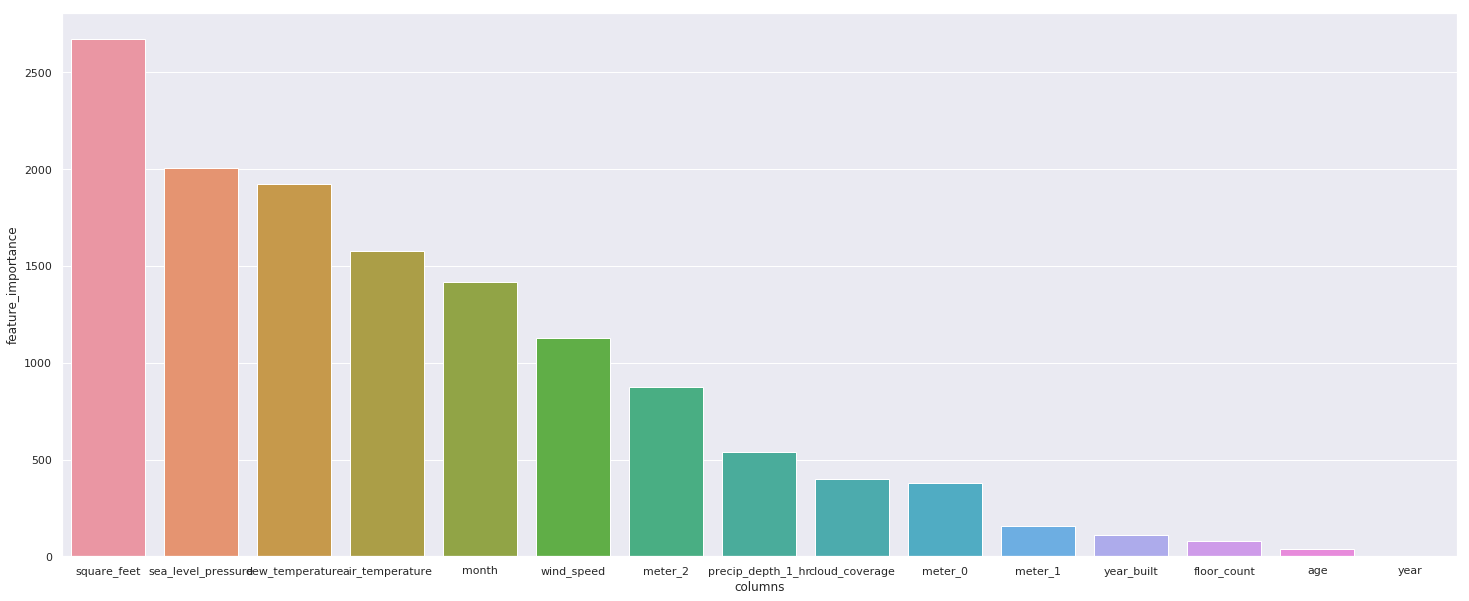

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_importance_df = pd.DataFrame({
    "columns":X_train.columns[:15],
    "feature_importance":gbm.feature_importance()[:15]
})
sns.set()
sns.set_context("notebook")
plt.figure(figsize=(25, 10))
sns.barplot(y="feature_importance", x="columns",data=feature_importance_df.sort_values('feature_importance',ascending=False))

# Most Of feature value created in this kernel is not contribute to this model
# on the contrary, bad effect

・Null値の扱い。

・季節

・TargetEncode

・

In [12]:
%%javascript
var notebook_name = document.body.attributes['data-notebook-name'].value
IPython.notebook.kernel.execute(`NOTEBOOK_NAME = '${notebook_name}'`);

<IPython.core.display.Javascript object>

In [16]:
import pickle
with open("1_lgbm.ipynb_model.pickle", mode='wb') as fp:
    gbm = pickle.load(fp)

UnsupportedOperation: read